In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd

dat_original = pd.read_csv('./Data/Complete_Data_20230210_SR.csv')
dat_original = dat_original.drop_duplicates(subset=['Date']) 
dat_original.sort_values(by=['Date']).head()

,Row,Date,Time,Date_DaysFrom,Water Level(mm) (raw values),Flow(L/sec),Conductivity(microsiemens/cm),Total Nitrogen(mg/L),Total Phosphorous(mg/L),Total KjeldahlNitrogen (mg/L),...,TempMean_48h(C),TempMean_72h(C),EearthTempMean_24h_10cm(C),EearthTempMean_48h_10cm(C),EearthTempMean_72h_10cm(C),SoilMoistMean_24h_20cm(%),SoilMoistMean_48h_20cm(%),SoilMoistMean_72h_20cm(%),Pmsl(hPa),Rad(MJ/m2)
62,63,1/06/2021,2:31:00 PM,151,630.0,105.0,165.0,4.4,0.132,1.11,...,7.600,7.583333,6.4,6.80,6.666667,33.645833,34.308333,34.337500,1012.3,7.04
26,27,1/08/2020,12:30:00 PM,213,473.0,14.0,151.0,4.0,0.028,0.28,...,9.475,8.158333,5.8,5.60,5.366667,32.950000,32.947917,32.931944,1019.3,2.71
31,32,1/09/2020,1:30:00 PM,244,841.0,840.0,109.0,2.6,0.250,1.36,...,9.125,11.350000,7.0,7.35,7.266667,37.975000,35.614583,35.112500,1009.6,7.72
12,13,10/03/2020,9:00:00 AM,69,720.0,314.0,132.0,2.8,0.142,0.65,...,15.200,15.308333,14.8,14.60,14.400000,31.379167,27.904167,26.861111,1008.8,4.34
86,88,10/08/2022,1:54:00 PM,221,513.0,53.0,153.0,2.7,0.042,0.41,...,1.475,2.425000,2.8,3.30,3.866667,38.500000,38.833333,39.330556,1019.5,5.13


In [2]:
import datetime

dat_filterred = dat_original[['Date', 'Water Level(mm) (raw values)', 'Conductivity(microsiemens/cm)',
                              'Total Nitrogen(mg/L)', 'Total Phosphorous(mg/L)', 'Total KjeldahlNitrogen (mg/L)',
                              'Nitrate-N + Nitrite-N(mg/L)',
                              'P1_MNDWI', 'P1_NDVI', 'P1_NIRv', 'P1_NSMI', 'P2_MNDWI', 'P2_NDVI', 'P2_NIRv', 'P2_NSMI',
                              'TotalRain_24h(mm)', 'TotalRain_48(mm)', 'TotalRain_72(mm)',
                              'TempMean_24h(C)', 'TempMean_48h(C)', 'TempMean_72h(C)',
                              'EearthTempMean_24h_10cm(C)', 'EearthTempMean_48h_10cm(C)', 'EearthTempMean_72h_10cm(C)',
                              'SoilMoistMean_24h_20cm(%)', 'SoilMoistMean_48h_20cm(%)', 'SoilMoistMean_72h_20cm(%)']]

dat_filterred.rename(columns={
                                'Water Level(mm) (raw values)': 'WL',
                                'Conductivity(microsiemens/cm)': 'Co',
                                'Total Nitrogen(mg/L)': 'TN',
                                'Total Phosphorous(mg/L)': 'TP',
                                'Total KjeldahlNitrogen (mg/L)': 'TKN',
                                'Nitrate-N + Nitrite-N(mg/L)': 'NNN',
                                'TotalRain_24h(mm)': 'Rain24',
                                'TotalRain_48(mm)': 'Rain48',
                                'TotalRain_72(mm)': 'Rain72',
                                'TempMean_24h(C)': 'AirT24',
                                'TempMean_48h(C)': 'AirT48',
                                'TempMean_72h(C)': 'AirT72',
                                'EearthTempMean_24h_10cm(C)': 'EarT24',
                                'EearthTempMean_48h_10cm(C)': 'EarT48',
                                'EearthTempMean_72h_10cm(C)': 'EarT72',
                                'SoilMoistMean_24h_20cm(%)': 'SM24',
                                'SoilMoistMean_48h_20cm(%)': 'SM48',
                                'SoilMoistMean_72h_20cm(%)': 'SM72'   
                              },
                     inplace=True)

dat_filterred['Date_copy'] = dat_filterred['Date'];
dat_filterred['Date'] = [datetime.datetime.strptime(d, "%d/%m/%Y") for d in dat_filterred['Date']];
dat_filterred['Date_ts'] = [d.timestamp() for d in dat_filterred['Date']];
dat_filterred['Date_float'] = [float(d) for d in dat_filterred['Date_ts']];

dat_filterred.set_index('Date', inplace=True);
dat_filterred.sort_index();
dat_filterred = dat_filterred.fillna(dat_filterred.median());
dat_filterred

C:\Users\SaeedR\AppData\Local\Temp\6\ipykernel_10604\1384352471.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_filterred.rename(columns={
C:\Users\SaeedR\AppData\Local\Temp\6\ipykernel_10604\1384352471.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_filterred['Date_copy'] = dat_filterred['Date'];
C:\Users\SaeedR\AppData\Local\Temp\6\ipykernel_10604\1384352471.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,WL,Co,TN,TP,TKN,NNN,P1_MNDWI,P1_NDVI,P1_NIRv,P1_NSMI,...,AirT72,EarT24,EarT48,EarT72,SM24,SM48,SM72,Date_copy,Date_ts,Date_float
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-20,391.0,149.0,3.50,0.058,0.61,2.90,-0.481367,0.772670,3456.133179,0.337457,...,9.900000,11.1,10.80,10.933333,27.141667,27.179167,27.166667,20/11/2019,1.574208e+09,1.574208e+09
2019-12-10,344.0,154.0,4.10,0.027,0.32,3.70,-0.485764,0.795757,3639.399841,0.370118,...,12.158333,12.9,12.70,12.733333,14.287500,14.685417,15.081944,10/12/2019,1.575936e+09,1.575936e+09
2019-12-17,414.0,147.0,2.90,0.052,0.41,2.50,-0.368403,0.694632,3446.986203,0.355603,...,11.350000,14.4,13.70,13.566667,16.637500,16.197917,15.545833,17/12/2019,1.576541e+09,1.576541e+09
2019-12-23,417.0,152.0,3.90,0.042,0.64,3.20,-0.368403,0.694632,3446.986203,0.355603,...,11.783333,12.9,13.15,13.033333,25.545833,26.064583,26.418056,23/12/2019,1.577059e+09,1.577059e+09
2020-01-07,476.4,147.6,2.90,0.032,0.39,2.60,-0.373528,0.703384,3523.298117,0.355156,...,11.450000,13.3,13.45,13.666667,21.341667,21.166667,20.905556,7/01/2020,1.578355e+09,1.578355e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-04,435.0,148.0,1.97,0.024,0.41,2.30,-0.172014,0.451001,1732.453632,0.271600,...,7.183333,4.7,4.90,4.766667,36.450000,36.808333,37.245833,4/07/2022,1.656893e+09,1.656893e+09
2022-08-10,513.0,153.0,2.70,0.042,0.41,2.30,-0.089355,0.378135,1707.971204,0.269476,...,2.425000,2.8,3.30,3.866667,38.500000,38.833333,39.330556,10/08/2022,1.660090e+09,1.660090e+09
2022-09-28,374.0,135.0,2.40,0.031,0.35,2.10,-0.291404,0.491373,2221.272887,0.193534,...,12.891667,11.4,11.05,10.633333,32.733333,32.964583,33.219444,28/09/2022,1.664323e+09,1.664323e+09


C:\Users\SaeedR\AppData\Local\Temp\6\ipykernel_10604\1384352471.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dat_filterred = dat_filterred.fillna(dat_filterred.median());


,WL,Co,TN,TP,TKN,NNN,P1_MNDWI,P1_NDVI,P1_NIRv,P1_NSMI,...,AirT72,EarT24,EarT48,EarT72,SM24,SM48,SM72,Date_copy,Date_ts,Date_float
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-20,391.0,149.0,3.50,0.058,0.61,2.90,-0.481367,0.772670,3456.133179,0.337457,...,9.900000,11.1,10.80,10.933333,27.141667,27.179167,27.166667,20/11/2019,1.574208e+09,1.574208e+09
2019-12-10,344.0,154.0,4.10,0.027,0.32,3.70,-0.485764,0.795757,3639.399841,0.370118,...,12.158333,12.9,12.70,12.733333,14.287500,14.685417,15.081944,10/12/2019,1.575936e+09,1.575936e+09
2019-12-17,414.0,147.0,2.90,0.052,0.41,2.50,-0.368403,0.694632,3446.986203,0.355603,...,11.350000,14.4,13.70,13.566667,16.637500,16.197917,15.545833,17/12/2019,1.576541e+09,1.576541e+09
2019-12-23,417.0,152.0,3.90,0.042,0.64,3.20,-0.368403,0.694632,3446.986203,0.355603,...,11.783333,12.9,13.15,13.033333,25.545833,26.064583,26.418056,23/12/2019,1.577059e+09,1.577059e+09
2020-01-07,476.4,147.6,2.90,0.032,0.39,2.60,-0.373528,0.703384,3523.298117,0.355156,...,11.450000,13.3,13.45,13.666667,21.341667,21.166667,20.905556,7/01/2020,1.578355e+09,1.578355e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-04,435.0,148.0,1.97,0.024,0.41,2.30,-0.172014,0.451001,1732.453632,0.271600,...,7.183333,4.7,4.90,4.766667,36.450000,36.808333,37.245833,4/07/2022,1.656893e+09,1.656893e+09
2022-08-10,513.0,153.0,2.70,0.042,0.41,2.30,-0.089355,0.378135,1707.971204,0.269476,...,2.425000,2.8,3.30,3.866667,38.500000,38.833333,39.330556,10/08/2022,1.660090e+09,1.660090e+09
2022-09-28,374.0,135.0,2.40,0.031,0.35,2.10,-0.291404,0.491373,2221.272887,0.193534,...,12.891667,11.4,11.05,10.633333,32.733333,32.964583,33.219444,28/09/2022,1.664323e+09,1.664323e+09


In [7]:
import pandas as pd
import numpy as np
import datetime

dat_NNN = pd.DataFrame(dat_filterred['NNN'])
dat_NNN.sort_index(inplace=True)
dat_NNN = dat_NNN.resample('d').interpolate()

# import matplotlib.pyplot as plt
# dat_NNN.plot();
# plt.show();

dat_NNN = dat_NNN.asfreq('w')
print(dat_NNN.index.freq)

<Week: weekday=6>


In [8]:
import sys

def print_progress_bar(index, total, label):
    n_bar = 50  # Progress bar width
    progress = index / total
    sys.stdout.write('\r')
    sys.stdout.write(f"[{'|' * int(n_bar * progress):{n_bar}s}] {int(100 * progress)}%  {label}")
    sys.stdout.flush()

In [20]:
import itertools
import statsmodels.api as sm

@jit
# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50,  freq='w'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter)
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])
   
    return ans_df

In [21]:
import numba
from numba import jit
from numba import cuda
from timeit import default_timer as timer
import warnings

with warnings.catch_warnings(record=True):
    # Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
    p = d = q = range(0, 3)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    # Note: here we have 12 in the 's' position as we have monthly data
    # You'll want to change this according to your time series' frequency
    pdqs = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

    start = timer()
    # Remember to change frequency to match your time series data
    grid_res = sarimax_gridsearch(pdq, pdqs, freq='w')
    cuda.profile_stop()
    print('    ', timer()-start, 'seconds, on single CPU with GPU')


    # Sort and return top 5 combinations
    grid_res = grid_res.replace(-np.inf, np.nan)
    grid_res = grid_res.dropna()
    grid_res_top5 = grid_res.sort_values(by=['bic'],ascending=True)[0:5]
    grid_res_top5

NameError: global name 'mark_try_block' is not defined

In [16]:

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

,pdq,pdqs,bic
69,"(0, 0, 2)","(1, 2, 0, 12)",-inf
49,"(0, 0, 1)","(2, 1, 1, 12)",-inf
48,"(0, 0, 1)","(2, 1, 0, 12)",-inf
76,"(0, 0, 2)","(2, 1, 1, 12)",-inf
42,"(0, 0, 1)","(1, 2, 0, 12)",-inf


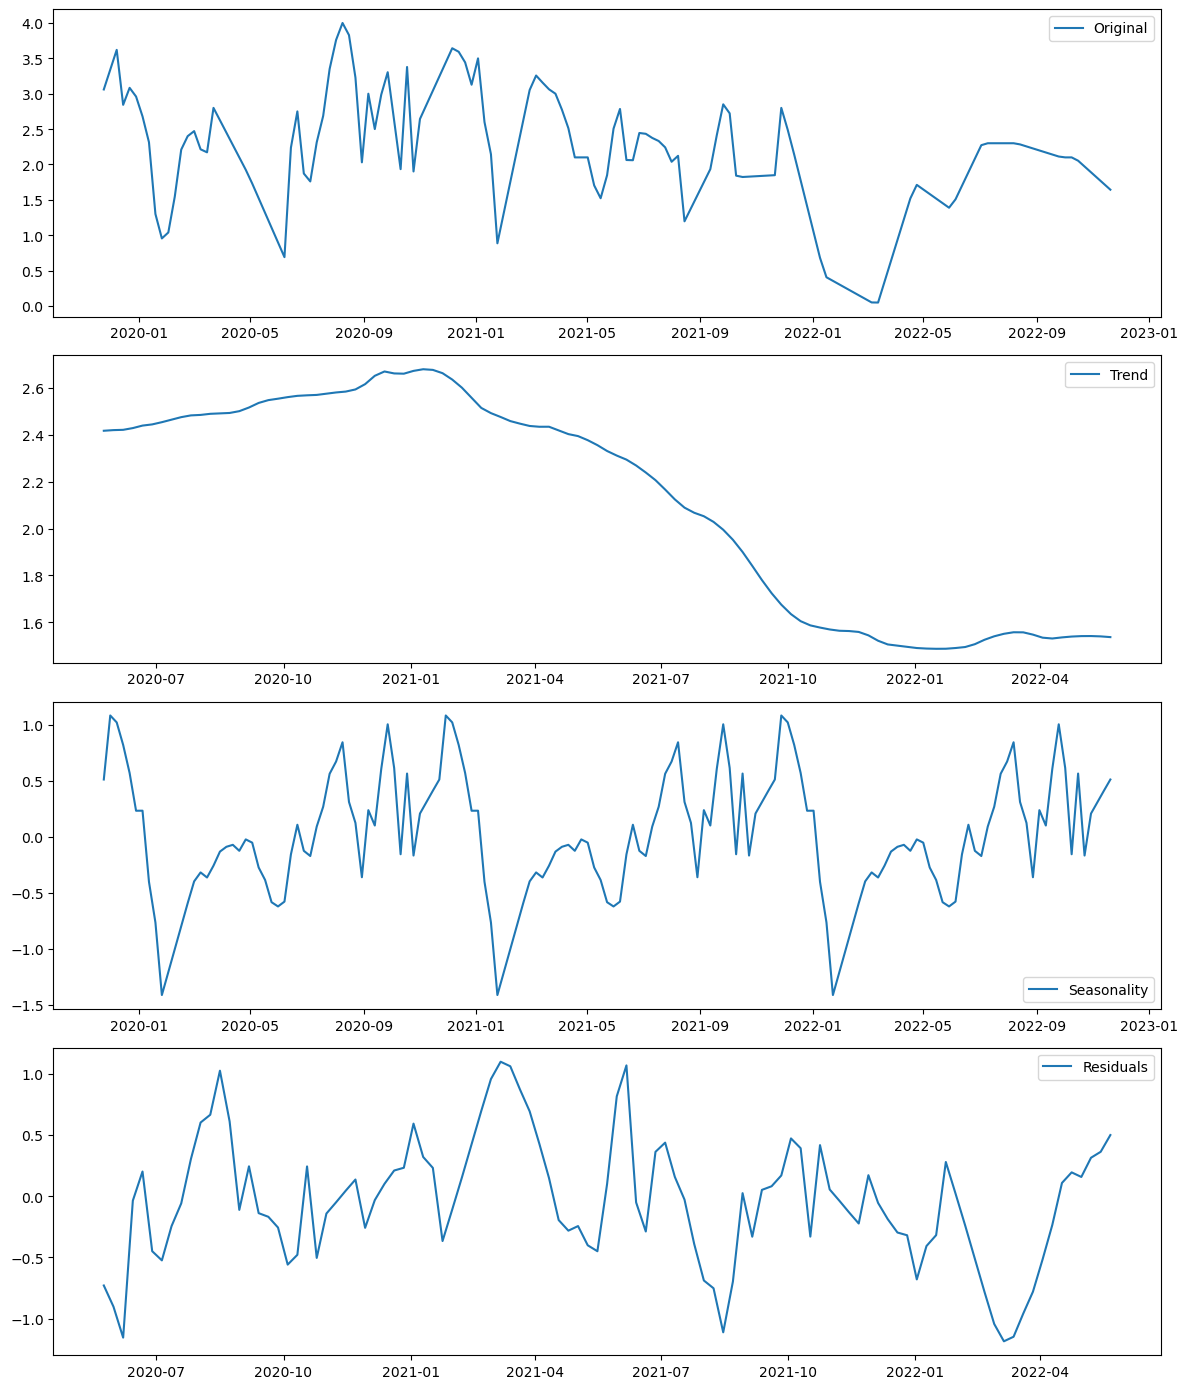

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

decomposition = sm.tsa.seasonal_decompose(dat_NNN, model='additive')#, period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 14))

plt.subplot(411);
plt.plot(dat_NNN, label='Original');
plt.legend(loc='best');
plt.subplot(412);
plt.plot(trend, label='Trend');
plt.legend(loc='best');
plt.subplot(413);
plt.plot(seasonal,label='Seasonality');
plt.legend(loc='best');
plt.subplot(414);
plt.plot(residual, label='Residuals');
plt.legend(loc='best');
plt.tight_layout();

C:\Users\sarsh\AppData\Local\Temp\ipykernel_13204\970447201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['NNN']
C:\Users\sarsh\AppData\Local\Temp\ipykernel_13204\970447201.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['NNN']


(<Figure size 1000x500 with 1 Axes>, <AxesSubplot:>)

Text(0, 0.5, 'NNN')

Text(0.5, 0, 'Date')

(array([18262., 18383., 18506., 18628., 18748., 18871., 18993., 19113.,
        19236., 19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Train/Test split for NNN')

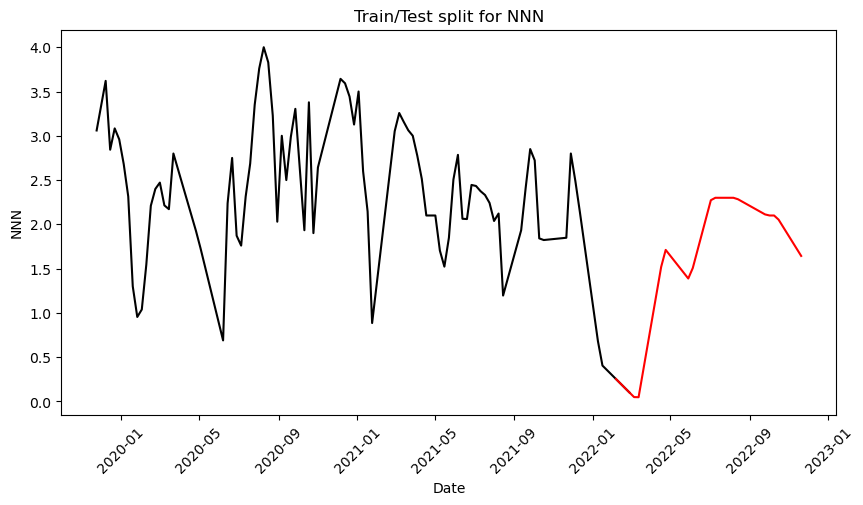

In [5]:
dat_NNN['Date'] = dat_NNN.index
train = dat_NNN[dat_NNN['Date'] < pd.to_datetime('28/02/2022', format='%d/%m/%Y')]
train['train'] = train['NNN']
del train['Date']
del train['NNN']
del dat_NNN['Date']

dat_NNN['Date'] = dat_NNN.index
test = dat_NNN[dat_NNN['Date'] >= pd.to_datetime('31/01/2022', format='%d/%m/%Y')]
del test['Date']
test['test'] = test['NNN']
del test['NNN']


plt.subplots(figsize=(10, 5))

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel("NNN");
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Train/Test split for NNN')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


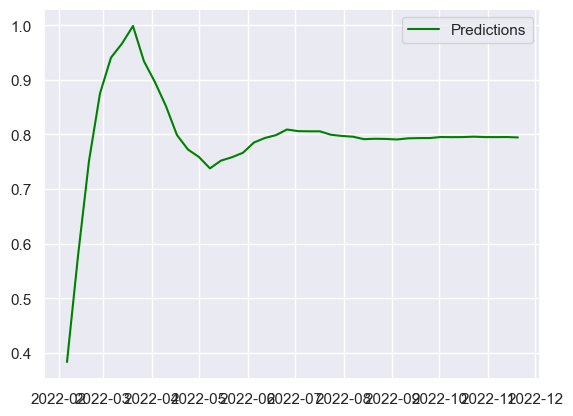

In [236]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

ARMAmodel = SARIMAX(train, order = (7, 5, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  2.0962068605155935


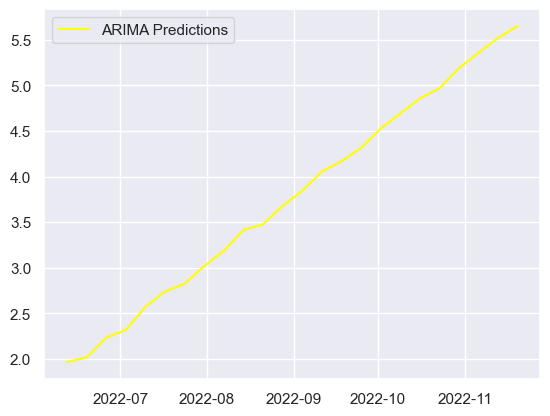

In [198]:
from statsmodels.tsa.arima.model import ARIMA

ARIMAmodel = ARIMA(train, order = (6, 3, 5))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test, y_pred_df["Predictions"]))
print("RMSE: ", arma_rmse)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


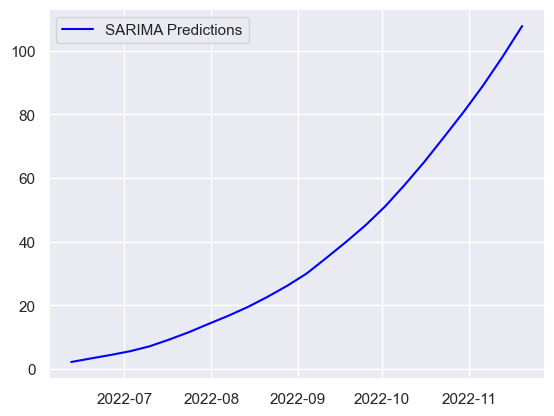

In [199]:
SARIMAXmodel = SARIMAX(train, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

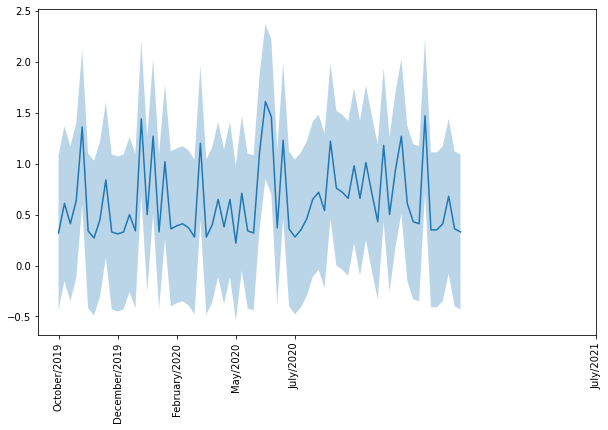

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Generate some sample data
x = dat_filterred['Date_copy']
y = dat_filterred['TKN']
upper_bound = y + 1.96 * np.std(y)
lower_bound = y - 1.96 * np.std(y)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual data with shaded confidence interval
ax.plot(x, y, label="Actual")
ax.fill_between(x, lower_bound, upper_bound, alpha=0.3, label="95% CI")

selected_dates = x.iloc[[0, 10, 20, 30, 40, 91]]
labels = [datetime.datetime.strptime(d, "%d/%m/%Y") for d in selected_dates]
labels = [d.strftime('%B/%Y') for d in labels]
plt.xticks([0, 10, 20, 30, 40, 91], labels, rotation ='vertical')

# # Add forecasted data with shaded confidence interval
# forecast_x = np.arange(10, 15, 0.1)
# forecast_y = np.sin(forecast_x)
# forecast_upper_bound = forecast_y + 1.96 * np.std(forecast_y)
# forecast_lower_bound = forecast_y - 1.96 * np.std(forecast_y)
# ax.plot(forecast_x, forecast_y, linestyle="--", label="Forecast")
# ax.fill_between(forecast_x, forecast_lower_bound, forecast_upper_bound, alpha=0.3)

# # Add axis labels and title
# ax.set_xlabel("Time")
# ax.set_ylabel("Value")
# ax.set_title("Fancy Forecasting Figure with 95% Confidence Interval")

# # Add a legend and grid
# ax.legend()
# ax.grid(True)

# # Add some annotations
# ax.annotate("Actual", xy=(4, 0.5), xytext=(4.5, 0.75), arrowprops=dict(facecolor='black', shrink=0.05))
# ax.annotate("Forecast", xy=(10, 0), xytext=(11, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))

# # Show the figure
plt.show();

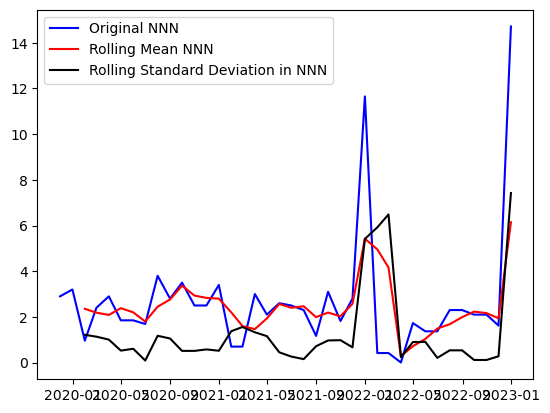

In [113]:
dat_NNN = dat_NNN.resample('m').ffill()
dat_NNN = dat_NNN.asfreq('m')

rolling_mean_NNN = dat_NNN.rolling(3).mean()
rolling_std_NNN = dat_NNN.rolling(3).std()

plt.plot(dat_NNN, color="blue",label="Original NNN");
plt.plot(rolling_mean_NNN, color="red", label="Rolling Mean NNN");
plt.plot(rolling_std_NNN, color="black", label = "Rolling Standard Deviation in NNN");
plt.legend(loc="best");

In [114]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(dat_NNN,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -7.508047e+00              Test Statistics
1  4.084795e-11                      p-value
2  1.000000e+01             No. of lags used
3  2.700000e+01  Number of observations used
4 -3.699608e+00          critical value (1%)
5 -2.976430e+00          critical value (5%)
6 -2.627601e+00         critical value (10%)


## NNN